<a href="https://colab.research.google.com/github/MarinaRuizSO/eurosat_analysis/blob/master/eurosat_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.1


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow.compat.v2 as tf

In [0]:
tf.compat.v1.enable_v2_behavior()

In [0]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_naturalist2017',
 'image_label_folder',
 'imagenet2012',
 'imagenet

In [0]:
eurosat_train, info = tfds.load(name="eurosat", split="train", data_dir= "/~/tf_datasets/eurosat", with_info=True) # added with_info
assert isinstance(eurosat_train, tf.data.Dataset)
print(eurosat_train)
# especify where the data is saved
# data_dir = (~/tensorflow_datasets/) by default

Shuffling and writing examples to /~/tf_datasets/eurosat/eurosat/rgb/2.0.0.incompleteBZ3N1V/eurosat-train.tfrecord


Dataset eurosat downloaded and prepared to /~/tf_datasets/eurosat/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.
<DatasetV1Adapter shapes: {filename: (), image: (64, 64, 3), label: ()}, types: {filename: tf.string, image: tf.uint8, label: tf.int64}>


In [0]:
eurosat = tfds.load

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Label: 1


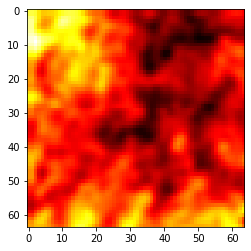

In [0]:
for eurosat_example in eurosat_train.take(1): # only take a single example
    image, label = eurosat_example["sentinel2"], eurosat_example["label"]
    plt.imshow(image.numpy()[:,:,12].astype(np.float32), cmap=plt.get_cmap("hot"))
    print("Label: %d" % label.numpy())

In [0]:
# alternatively, can do the same as above by using DatasetBuilder

# eurosat_builder = tfds.builder("eurosat")
# eurosat_builder.download_and_prepare()
# eurosat_builder = eurosat.builder.as_dataset(split="train")


# Input Pipeline

In [0]:
eurosat_train = eurosat_train.repeat().shuffle(1024).batch(32)

# prefetch will enable you the input pipeline to asynchronously fetch batches 
# while the model is training
eurosat_train = eurosat_train.prefetch(tf.data.experimental.AUTOTUNE)

# now loop over the batches of the dataset and train for batch in eurosat_train
# ...

# Dataset Info

In [0]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

NameError: ignored

In [0]:
print(info)

tfds.core.DatasetInfo(
    name='eurosat',
    version=2.0.0,
    description='EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
bands and consisting of 10 classes with 27000 labeled and
geo-referenced samples.

Two datasets are offered:
- rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
- all: Contains all 13 bands in the original value range (float32).

URL: https://github.com/phelber/eurosat
',
    homepage='https://github.com/phelber/eurosat',
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(64, 64, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=27000,
    splits={
        'train': 27000,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{helber2017eurosat,
        title={EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification},
     

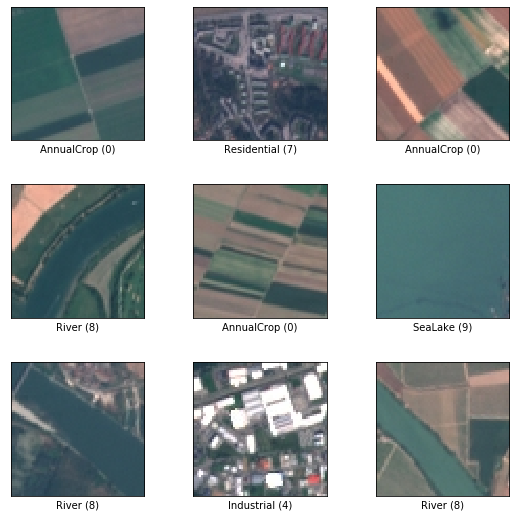

In [0]:
fig = tfds.show_examples(info, eurosat_train)

# Integration of tf.datasets with Keras

In [0]:
from tensorflow import keras

In [0]:
keras.__version__

'2.2.4-tf'

In [0]:
eurosat = 